## Prediction Using Supervised Machine Learning
### Danish Elahi

 Predicting the score percentage of students based on number of study hours.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score

C:\Users\Danish Elahi\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importing data and exploring it
exploring data using <code>.head</code> , <code>.info</code> , <code>.describe</code> functions

In [2]:
student_data = pd.read_csv('student_scores.csv')

In [3]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
student_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### Visualizing the data
using regplot from seaborn library to observe the relationship between variables

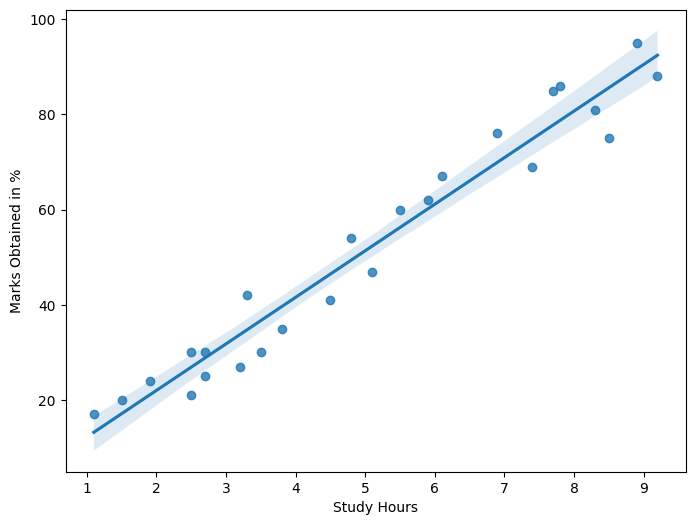

In [6]:
plt.figure(figsize=(8,6))
sns.regplot(data=student_data, x="Hours", y="Scores")
plt.xlabel('Study Hours')
plt.ylabel('Marks Obtained in %')
plt.show()

Preparing data to split for training the model

In [7]:
X = student_data.iloc[: , :-1].values
y = student_data.iloc[: , 1].values

### Spliting data
Using <code>train_test_split</code> function from sklearn library<br>
Splitting the data into <b>20%</b> test data and <b>80%</b> training data

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,
                                                       random_state = 0 ,
                                                       test_size = 0.2)

In [9]:
X_train.shape , y_train.shape

((20, 1), (20,))

### Model Creation
The problem is regression problem so,<br> I am
using the <b>LinearRegression Model</b> from sklearn library

In [10]:
linear_model = LinearRegression()

### Model Training
Training the model on training data

In [11]:
linear_model.fit(X_train , y_train)

LinearRegression()

### Getting Predictions
Predicting the scores of test data and comparing the actual and predicted values

In [12]:
y_pred = linear_model.predict(X_test)
print(f'Predicted Scores : {y_pred}, Actual Scores : {y_test}')

Predicted Scores : [16.88414476 33.73226078 75.357018   26.79480124 60.49103328], Actual Scores : [20 27 69 30 62]


### Model Evaluation
1. Calculating the average error rate using <code>mean_absolute_error</code> from sklearn<br>
2. Checking the overall accuracy of the model using <code>r2_score</code>

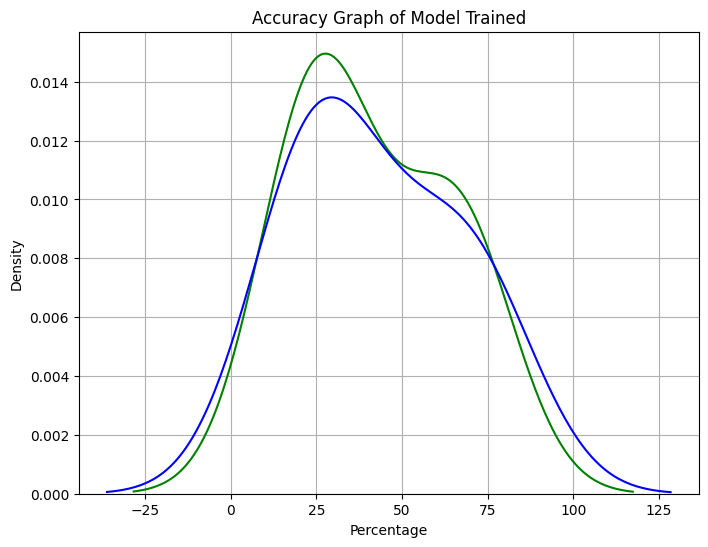

In [13]:
plt.figure(figsize = (8,6))
sns.kdeplot(y_test , label = 'Actual' , color = 'g')
sns.kdeplot(y_pred , label = 'Predicted' , color = 'b')

plt.title('Accuracy Graph of Model Trained')
plt.xlabel('Percentage')

plt.grid(True)
plt.show()

In [14]:
error_rate = mean_absolute_error(y_test , y_pred)
print(f'Average Absolute Error is: {error_rate}')

Average Absolute Error is: 4.183859899002975


In [15]:
r2 = r2_score(y_test , y_pred)
print(f'R2 score is : {r2}')

R2 score is : 0.9454906892105355


### Custom Predicting

In [16]:
hours = np.array([9.25]).reshape(1,-1)
own = linear_model.predict(hours)
print(own)

[93.69173249]
